<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>    
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Step 2. Import the dataset

In [25]:
df = pd.read_csv("50_Startups.csv")

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Step 3 . Check the State Column

In [27]:
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

## Step 4 . Splitting dataset in to input and output

In [29]:
x = df.iloc[::,:4:]
y = df.iloc[::,4::]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [33]:
x1 = pd.get_dummies(x, columns =['State'], drop_first = True)

In [35]:
x1

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


## Step 6 . Dummy variable trap

In [17]:
# Already Performed using | drop_first =True

## Step 7 Splitting dataset in to Train and Test

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.33,random_state=42)

## Step 8  Import LinearRegression model from linear_model family 

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Step 9  Fit the data

In [67]:
model.fit(x_train,y_train)

LinearRegression()

## Step 10  Predict the data

In [70]:
y_predict = model.predict(x_test)

## Step 11  Display Result

In [22]:
# y_test and y_predict

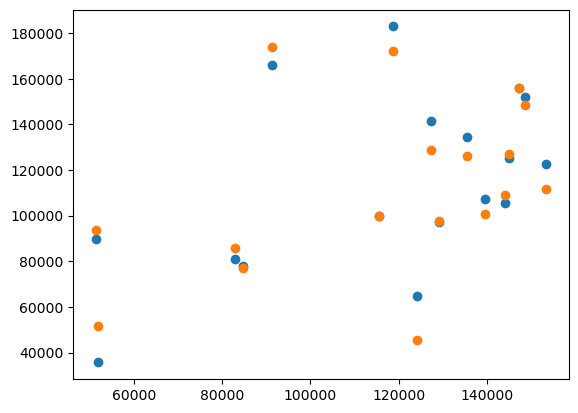

In [73]:
plt.scatter(x_test['Administration'],y_test)
plt.scatter(x_test['Administration'],y_predict)

## RSS

In [75]:
np.sum((y_test.values - y_predict)**2)

1269201639.5358815

In [77]:
len(y_test)

17

In [79]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(y_test.values,y_predict)*len(y_predict)

1269201639.5358815

In [83]:
len(y_predict)

17

## R Square

In [85]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,y_predict)

0.9475312056928278

## Now use Polynomial Regression on Position_Salaries dataset

In [93]:
df1 = pd.read_csv("Position_Salaries.csv")

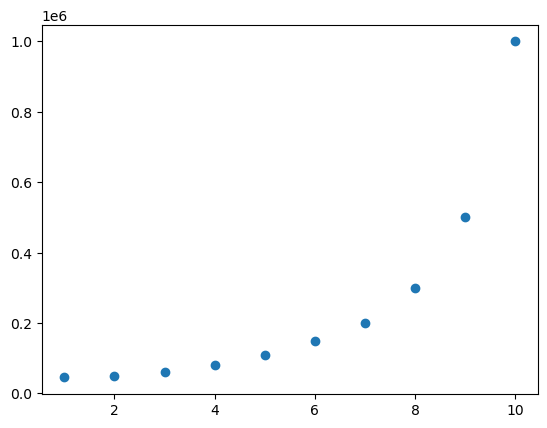

In [95]:
plt.scatter(df1['Level'],df1['Salary'])

In [152]:
x = df.iloc[::,1:2:]
y = df['Salary']
# x.shape
# y.shape

(10,)

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)
x_train

,Level
2,3
1,2
9,10
7,8
3,4
6,7
4,5


In [154]:
from sklearn.preprocessing import PolynomialFeatures

In [208]:
poly = PolynomialFeatures(degree = 10)

In [209]:
x1 = poly.fit_transform(x_train)
x1

array([[1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03, 1.96830000e+04, 5.90490000e+04],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06, 1.00000000e+07,
        1.00000000e+08, 1.00000000e+09, 1.00000000e+10],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 3.27680000e+04, 2.62144000e+05, 2.09715200e+06,
        1.67772160e+07, 1.34217728e+08, 1.07374182e+09],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+

In [211]:
model1 = LinearRegression()

In [214]:
model1.fit(x1,y_train)

LinearRegression()

In [216]:
y_poly_predict = model1.predict(poly.fit_transform(x_test))

In [218]:
y_poly_predict

array([534753.92278567, 148214.11999255,  47014.83400916])

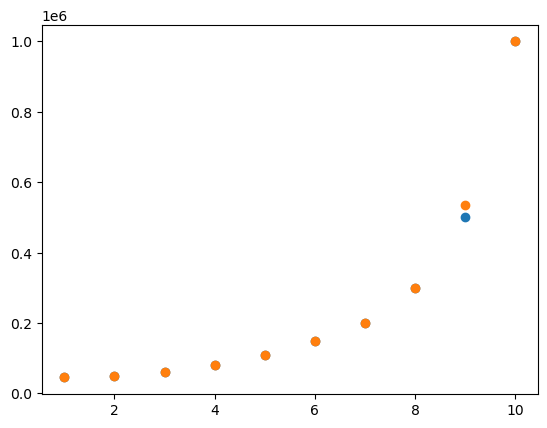

In [220]:
plt.scatter(df['Level'],df['Salary'])
plt.scatter(df['Level'],model1.predict(poly.fit_transform(x)))

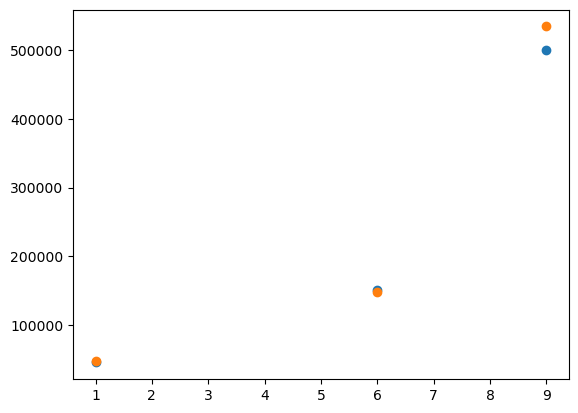

In [222]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_poly_predict)